In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from FLD_methods import *

In [3]:
# import large SCOPE simulated dataset
# get the filepath names
e_large_pathname = "/Users/jameswallace/Desktop/Esun.csv"
l_large_pathname = "/Users/jameswallace/Desktop/Lo_spectrum_inclF.csv"
f_large_pathname = "/Users/jameswallace/Desktop/fluorescence_scalars.csv"
# place the spectra in readable dataframes
e_large_df = get_simulated_spectral_df(e_large_pathname)
l_large_df = get_simulated_spectral_df(l_large_pathname)
f_large_df = pd.read_csv(f_large_pathname)
f_large_df = f_large_df.iloc[2:]
f_large_df.index = np.arange(0, len(e_large_df))
# get the O2A fluorescence from the fluorescence scalars df
f_large_761 = pd.to_numeric(f_large_df['F761'])

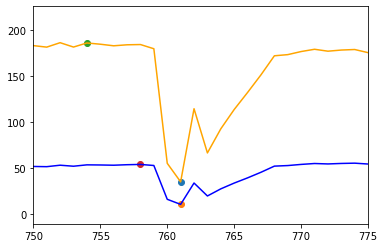

0.3348204494290961

In [4]:
sFLD(np.asarray(e_large_df.iloc[0]) / np.pi, np.asarray(l_large_df.iloc[0]), np.arange(400, 2562), plot = True)

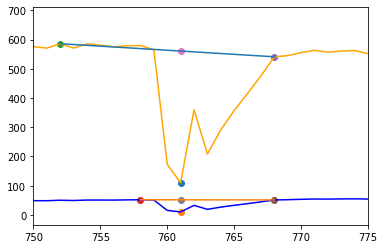

0.015461318459343263

In [5]:
three_FLD(np.asarray(e_large_df.iloc[1]), np.asarray(l_large_df.iloc[1]), np.arange(400, 2562), plot = True)

In [6]:
# Test effect of buffer values on 3FLD

8


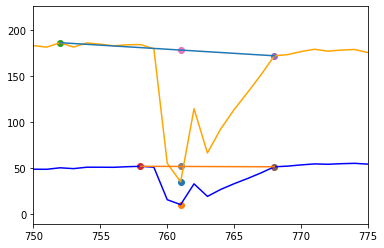

9


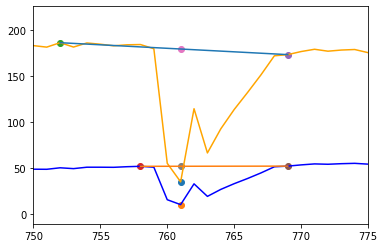

10


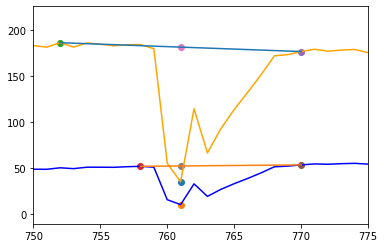

11


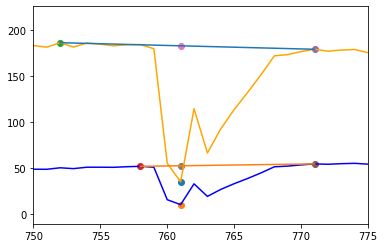

12


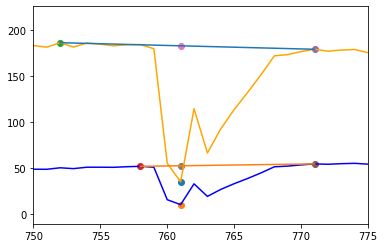

In [12]:
for buffer in range(8, 13):
    print(buffer)
    three_FLD(np.asarray(e_large_df.iloc[1]) / np.pi, np.asarray(l_large_df.iloc[1]), np.arange(400, 2562), buffer_out=buffer, plot = True)

In [22]:
# now get average percentage error for each buffer size and compare
# test the 3FLD method
percentage_errors = []
for i in range(len(e_large_df)):
    error = f_large_761.iloc[i] - three_FLD(np.asarray(e_large_df.iloc[i]) / np.pi, np.asarray(l_large_df.iloc[i]), np.arange(400, 2562), buffer_out = 12, plot = False)
    percentage_error = 100 * abs(error) / f_large_761.iloc[i]
    percentage_errors.append(percentage_error)

np.mean(percentage_errors)

74.85678160784325

In [23]:
# test for each buffer size
buffers = []
for buffer in range(5, 15):
    percentage_errors = []
    for i in range(len(e_large_df)):
        error = f_large_761.iloc[i] - three_FLD(np.asarray(e_large_df.iloc[i]) / np.pi, np.asarray(l_large_df.iloc[i]), np.arange(400, 2562), buffer_out = buffer, plot = False)
        percentage_error = 100 * abs(error) / f_large_761.iloc[i]
        percentage_errors.append(percentage_error)
    buffers.append(percentage_errors)

In [35]:
for i in range(len(buffers)):
    print(5 + i)
    print(np.mean(buffers[i]))

5
264.8628019609814
6
123.6711954155696
7
99.40055160180239
8
85.75891787879183
9
83.74012649922186
10
78.5752862243703
11
74.89455701573358
12
74.85678160784325
13
77.22103469567116
14
78.63733532784401


In [ ]:
# repeat for sFLD method

# optimise buffer out
# change sFLD method to take argument for buffer out
# get percentage errors for each buffer